## <center>Elements Of Data Science - F2020</center>
# <center>Week 5: Intro to Machine Learning Models<center>
### <center>10/12/2020</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# TODOs

- Readings:
 - Recommended: https://scikit-learn.org/stable/supervised_learning.html
 - Reference: PML Chapter Chap 3
    
- Answer and submit Quiz 5

- HW1, Due Thurs Oct 22nd, 11:59pm ET



# Today

- Multi-Armed Bandit (previous week's slides)
- Intro to Machine Learning Models
 - Various types of ML
 - Linear models

# Git Stash
<br>

Git will not allow you to pull new version of files if there is a conflict.

Common source of conflict:

1. Slide notebook is pushed and pulled
2. You make changes to the notebook (encouraged!)
3. I post new updates to the notebook (fixes, etc).

Now your version and the current version on github both have new changes: Conflict!

Solution: Stash your changes

```bash
$ cd eods-f20
$ git stash
$ git pull
```

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Modeling and ML

- What is a Model?
 - Specification of a mathematical (or probabilistic) relationship between different variables.
 

- What is Machine Learning?
 - Creating and using models that are learned from data.

# Questions for  Models

In [2]:
df_wine = pd.read_csv('../data/wine_dataset.csv',usecols=['alcohol','ash','proline','hue','class'])
df_wine.sample(5,random_state=1)

,alcohol,ash,hue,proline,class
161,13.69,2.54,0.96,680.0,2
117,12.42,2.19,1.06,345.0,1
19,13.64,2.56,0.96,845.0,0
69,12.21,1.75,1.28,718.0,1
53,13.77,2.68,1.13,1375.0,0


- Can we predict label "class" from the other columns? (Classification)
- Can we predict target "hue" from the other columns? (Regression)
- What are the important features when predicting "hue"? (Feature Selection)
- Can a model tell us about how the features and target interact? (Interpretation)
- Do the features group together at all? (Clustering)

# Data Vocab for ML

In [3]:
df_wine.sample(5,random_state=1)

,alcohol,ash,hue,proline,class
161,13.69,2.54,0.96,680.0,2
117,12.42,2.19,1.06,345.0,1
19,13.64,2.56,0.96,845.0,0
69,12.21,1.75,1.28,718.0,1
53,13.77,2.68,1.13,1375.0,0


- $X$, features, attributes, independent/exogenous/explanatory variables
 - Ex: alcohol, trip_distance, company_industry


- $y$, target, label, outcome, dependent/endogenous/response variables
 - Ex: class, hue, tip_amount, stock_price


- $f(X)\rightarrow y$, Model that maps features $X$ to target $y$


# Variations of ML Tasks
<br>

- Supervised vs Unsupervised
 - is there a target/label?
   

- Regression vs Classification
 - is the target numeric or categorical?
   

- Interpretation vs Prediction
 - generate predictions or understand interactions?

- Model Family
 - Linear, Tree, Distance, Probability, Neural Net, Ensemble

# Supervised vs Unsupervised vs Reinforcement Learning

Is there a target, $y$?

- Yes:
 - **Supervised Learning:** Data consists of $(X,y)$ pairs
 - Classification, Regression
 - Ex: What is the relationship between length of ride and tip amount?

- No:
 - **Unsupervised Learning:** Data consists only of $(X)$
 - Clustering, Topic Modeling, etc.
 - Ex: Are there any clusters in length of ride?

- Eventually:
 - **Reinforcement Learning**
 - After a series of predictions (path) get a reward from a reward function
 - Ex. Poker player

# Other Learning Paradigms
<br>

- Do we have a mix of labeled and unlabeled?
 - **Semi-Supervised Learning**
 - Can we use structure of unlabeled data along with labeled?

- Will we continue getting new data?
 - **Online Learning**
 - Is there an oracle (ground truth) we can consult?
 - Can we select which points to make predictions on?

# Supervised Learning: Regression vs Classification
<br>

- **Regression** -> predict a numeric value
 - Ex: tip_amount, stock_price, wine_hue
<br>


- **Classification** -> predict a discrete class/category
 - Ex: class of wine, face/not face, object labels in image
<br>


- can convert a regression problem into classification with binning/thresholding
<br>
<br>
<div align="center">
    <table><tr>
        <td><img src="images/regression.png" width="350px"></td>
        <td><img src="images/classification.png" width="350px"></td>
        </tr></table></div>
From PML

# Interpretation vs Prediction
<br>

- Do we care more about understanding how XX relates to yy?
 - Ex: What happens to tip size as taxi trip length increases?
 - Ex: What is the relationship between debt and loan default?
<br>


- Do we care more about generating predictions?
 - Ex: For a given trip, what will the tip size likely be?
 - Ex: For a given loan, will there be a default?

# Model Families for Supervised Learning

- Linear
 - Simple/Multiple Linear Regression
 - Logistic Regression (for Classification)
 - Support Vector Machines
 - <font color="gray">Perceptron</font>

- Tree Based
 - Decision Tree

- Distance Based
 - K-Nearest Neighbor

# Model Families for Supervised Learning Continued


- Probability
 - Naive Bayes?
 - <font color="gray">Bayes Net</font>

- Ensemble
 - Random Forest
 - Gradient Boosted Trees
 - Stacking
 
- Network
 - Multi-layer Perceptron?
 - <font color="gray">Deep Neural-Networks/font>
 - <font color="gray">Convolutional Neural Nets</font>
 - <font color="gray">Recurrant Neural Nets</font>

# Example: Regression with a Linear Model
<br>

What is the relationship between 'proline' (an amino-acid) and 'alcohol' in wine?

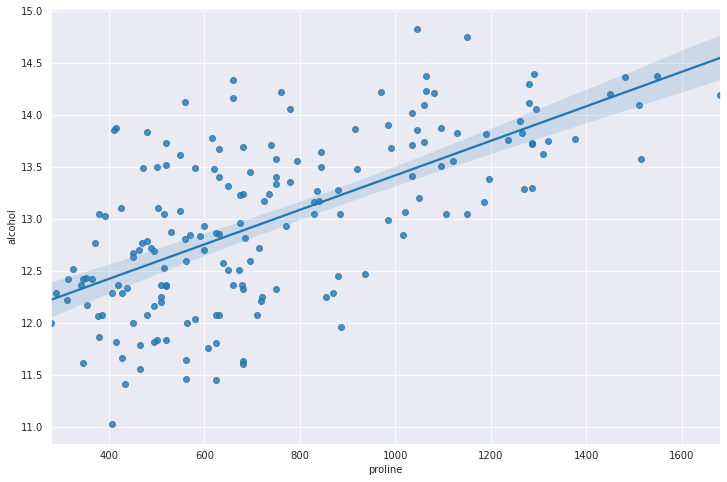

In [4]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.regplot(x='proline', y='alcohol', data=df_wine);

# Aside: Correlation

**Question:** are total_bill and tips correlated?

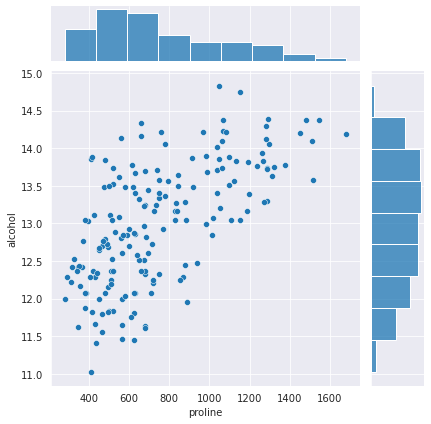

In [5]:
sns.jointplot(x='proline',y='alcohol',data=df_wine);

# Obligitory Correlation vs. Causation
<br>

<div align="center"><img src="https://imgs.xkcd.com/comics/correlation.png" width="800px"></div>
<br>

- Correlation does not mean causation!
<br>

- Causal Inference
 - controlled experiment
 - control for confounding variables


# Spurious Correlation
<br>

- Also, look hard enough and you'll find correlation.
    - See [spurious correlations](https://www.tylervigen.com/spurious-correlations) for examples


<div align="center"><img src="images/spurious_correlation.png" width="800px"></div>


# Aside: Correlation
<br>

- Could calculate Pearson Correlation Coefficient
- Assumes normally distributed data! (which is not true here)
 - [On the Effects of Non-Normality on the Distribution of the Sample Product-Moment Correlation Coefficient](https://www.jstor.org/stable/2346598?seq=1#page_scan_tab_contents]())

In [6]:
from scipy.stats import pearsonr
r,p = pearsonr(df_wine.proline,df_wine.alcohol)
print(f'r: {r:.2f}, p: {p:.2f}')

r: 0.64, p: 0.00


- We know that as proline goes up alcohol goes up, but by how much?

# Python Modeling Libraries
<br>

Prediction - scikit-learn

<div align="center"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png?1602365086087" width="200px"></div>
<br>

Interpretation - scikit-learn and statsmodels
<br>

<div align="center"><img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" width="400px"></div>
<br>

Additional Tools - mlxtend

<div align="center"><img src="http://rasbt.github.io/mlxtend/img/logo.png" width="200px"></div>

# Aside: MLxtend and conda-forge


- **MLxtend:** (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks.

<div align="center"><img src="http://rasbt.github.io/mlxtend/img/logo.png" width="200px"></div>


- **Conda-Forge:** A community-led collection of recipes, build infrastructure and distributions for the conda package manager.

<div align="center"><img src="https://avatars0.githubusercontent.com/u/11897326?s=200&v=4"></div>

```bash
$ conda install --name eods-f20 --channel conda-forge mlxtend
```


# Simple Linear Regression

$\Large y = w_1 x + w_0 + \varepsilon_i$
<br>


- **$y$** : dependent, endogenous, response, target, label (Ex: `alcohol`)

- **$x_i$** : independent, exogenous , explanatory, feature, attribute (Ex: `proline`)

- **$w_1$** : coefficient, slope

- **$w_0$** : bias term, intercept

- **$\varepsilon_i$** : error, hopefully small, often assumed $\mathcal{N}(0,1)$


- Want to find values for $w_1$ and $w_0$ that best fit the data.
- Find a line as close to our observations as possible

# Simple Linear Regression
<br>

<div align="center"><img src="images/simple_linear_regression.png" width="700px"></div>

from PML

# Finding $w_1$ and $w_0$ with Ordinary Least Squares


- **prediction**: $\hat{y}_i = f(x_i) = w_1 x_i + w_0$


- **error**: $error(y_i,\hat{y}_i) = y_i - \hat{y}_i$


- **sum of squared errors**: $\sum_{i=1:n}{\left(y_i - \hat{y}_i\right)^2}$


- **least squares**: make the sum of squared errors as small as possible


- **gradient descent**: minimize error by following the gradient wrt $w_1,w_0$

    - can sometime be optimized in closed form

    - often done iteratively


# Aside: Gradient Descent


- Want to maximize or minimize something (Ex: squared error)
<br>

- **Gradient** : direction, vector of partial derivatives
    - can get complicated, often estimated
<br>
<br>
- **Gradient Descent** : take steps wrt the direction of the gradient
    - **maximize** : in the direction of the gradient
    - **minimize** : in the opposite direction of the gradient
<br>
<br>
- **Global Maximum/Minimum** : the single best solution

- **Local Maximum/Minimum** : the best solution in the neighborhood


# Aside: Gradient Descent Cont.
<br>
<br>
<div align="center"><img src="images/gradient_descent.png" width="1000px"></div>

# Simple Regression Using scikit-learn

In [7]:
# import the model from sklearn
from sklearn.linear_model import LinearRegression 

In [8]:
 # instantiate the model and set hyperparameters
lr = LinearRegression(fit_intercept=True, # by default
                      normalize=False)    # by default

In [9]:
# fit the model
lr.fit(X=df_wine.proline.values.reshape(-1, 1), y=df_wine.alcohol); 

In [10]:
# display learned coefficients (_ in)
print(lr.coef_)
print(lr.intercept_) 

[0.0016595]
11.761148483143147


In [11]:
# predict given new values for proline
X = np.array([1000,2000]).reshape(-1,1)
lr.predict(X)

array([13.42064866, 15.08014884])

# Why .reshape(-1,1)?
<br>


scikit-learn models expect the input features to be 2 dimensional

In [12]:
df_wine.proline.values[:5]

array([1065., 1050., 1185., 1480.,  735.])

In [13]:
df_wine.proline.values.shape

(178,)

In [14]:
df_wine.proline.values.reshape(-1,1).shape

(178, 1)

-1 means "infer from the data"

# Interpreting Coefficients

In [15]:
print(f'beta={lr.coef_[0]:0.3f}, alpha={lr.intercept_:0.3f}')

beta=0.002, alpha=11.761


In [16]:
print(f'alchohol = {lr.coef_[0]:0.3f}*proline + {lr.intercept_:0.3f}')

alchohol = 0.002*proline + 11.761


- When proline goes up by 1, alcohol goes up by .002
- When proline is 0, alcohol is 11.761

# Plotting The Model

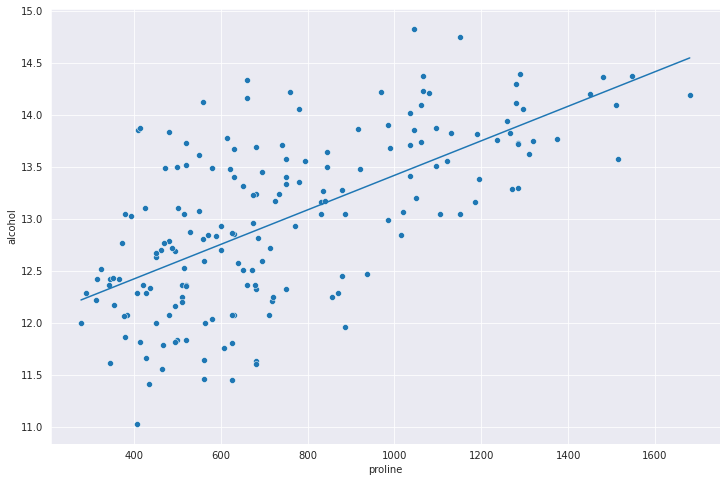

In [17]:
x_predict = [df_wine.proline.min(),df_wine.proline.max()]
y_hat = lr.predict(np.array(x_predict).reshape(-1,1))

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.scatterplot(x=df_wine.proline,y=df_wine.alcohol);
ax.plot(x_predict,y_hat);

# Multiple Linear Regression
<br>

- Including multiple independent variables

$y_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + \ldots + w_m x_{im} + \varepsilon_i$


Ex: 

<center>alcohol = w_0 + w_1*proline + w_2*hue</center>


Objective: Find a plane that falls as close to our points as possible

<div align="center"><img src="images/multiple_linear_regression.png" width="500px"></div>

# Multiple Linear Regression in scikit-learn

In [18]:
mlr = LinearRegression()
mlr.fit(df_wine[['proline','hue']],y=df_wine.alcohol);

for (name,coef) in zip(['proline','hue'],mlr.coef_):
    print(f'{name:10s} : {coef: 0.3f}')
print(f'{"intercept":10s} : {mlr.intercept_:0.3f}')

proline    :  0.002
hue        : -0.842
intercept  : 12.459


- If we hold everything else constant, what effect does the variable have
- If hue is held constant, a rise of 1 proline -> rise of .002 in alcohol
- If proline is held constant, a rise of 1 hue -> decrease of .842 in alcohol

- Can add interaction terms to allow both to move
 - Ex: hue * proline
 - more complicated to interpret

# Multiple Linear Regression in statsmodels

In [19]:
import statsmodels.api as sm

X = df_wine[['proline','hue']]
X = sm.add_constant(X)
y = df_wine.alcohol                
sm_mlr = sm.OLS(y,X).fit() # Note: X,y passed as parameters to object, not fit
sm_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     76.79
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.15e-24
Time:                        18:48:54   Log-Likelihood:                -158.89
No. Observations:                 178   AIC:                             323.8
Df Residuals:                     175   BIC:                             333.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4593      0.203     61.347      0.000      12.058      12.860
proline        0.0018      0.000     12.325      0.000       0.002       0.002
hue           -0.8418      0.202     -4.175      0.000      -1.240      -0.444
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.606
Skew:                           0.142   Prob(JB):                        0.739
Kurtosis:                       3.028   Cond. No.                     4.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dealing With the Intercept/Bias

- Two ways of keeping track of the bias term

1. Keep it as a separate parameter: 

 - $\Large y = w_0 + w_1x_1 + w_2x_2 + \ldots + w_mx_m$
 - $\Large y = w_0 + \sum_{i=1}^{m}{w_ix_i}$

2. Append a constant of $x_0=1$ so $x$ and $w$ are the same length

 - $\Large y = w_0x_0 + w_1x_1 + w_2x_2 + \ldots + w_mx_m$
 - $\Large y = \sum_{i=0}^{m}{w_ix_i}$

# Standardizing/Normalizing Features for Interpretation

In [20]:
for (name,coef) in zip(['proline','hue'],mlr.coef_):
    print(f'{name:10s} : {coef: 0.3f}')

proline    :  0.002
hue        : -0.842


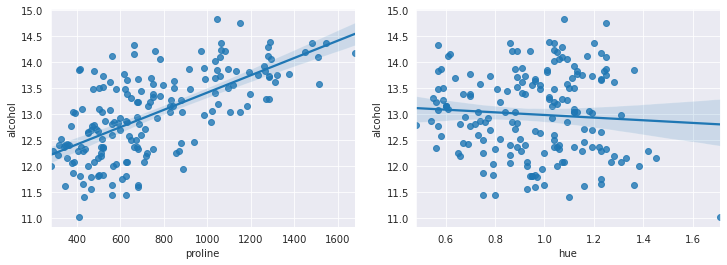

In [21]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.regplot(x='proline',y='alcohol',data=df_wine,ax=ax[0])
sns.regplot(x='hue',y='alcohol',data=df_wine,ax=ax[1]);

What would the coefficents look like if the features were on the same scale?

# Standardizing/Normalizing Features for Gradient Descent
<br>

<center>$\Large z = \frac{x - \bar{x}}{s}$</center>

<div align="center"><img src="images/gradient_descent_with_standardization.png" width="600px"></div>

From PML

# Multiple Linear Regression with Standardization/Normalization

- `DataFrame.apply()`: apply a function to each column (axis=0) or each row (axis=1)

In [22]:
X_zscore = df_wine[['proline','hue']].apply(lambda x: (x-x.mean())/x.std(),axis=0)

mlr_n = LinearRegression()
mlr_n.fit(X_zscore, df_wine.alcohol)
for (name,coef) in zip(X_zscore.columns,mlr_n.coef_):
    print(f'{name:10s} : {coef: 0.3f}')

proline    :  0.568
hue        : -0.192


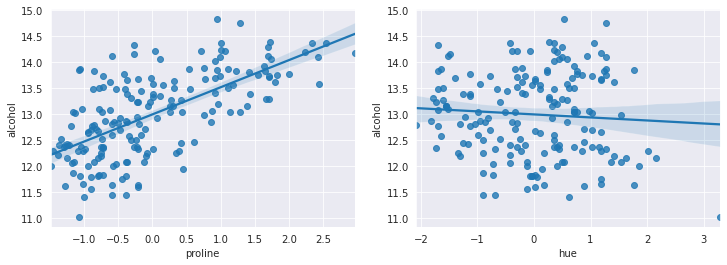

In [23]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.regplot(x=X_zscore.proline,y=df_wine.alcohol,ax=ax[0]);
sns.regplot(x=X_zscore.hue,y=df_wine.alcohol,ax=ax[1]);

# Colinarity

- MLR assumes features are linearly independent
 - eg: Can't rewrite one column as a weighted sum of the others
 - Ex: in tips dataset: number of entrees ordered will likely be linearly related to table size
<br>


- Issue: Model won't know how to estimate $w$
 - If we add to one $w_i$ and subtract from another, there will be no change in error
<br>


- Try to remove obvious colinearity
 - can use correlation and linear regression to detect
 - Important to consider when constructing categorical features (feature engineering)

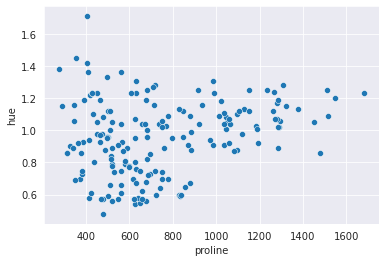

In [24]:
sns.scatterplot(x='proline',y='hue',data=df_wine);

# Aside: Interpretation Vs. Prediction
<br>


- Interpretation: Explain how observed features relate to observed target
- Prediction: Given new features, can we generate a prediction
<br>
    
- Often asked to do one or the other, be clear which is most important
- In prediction, may not worry about interpreting the model!
<br>

- There is increased attention on interpretability

<br>
<br>

# <center>Questions re Regression with Linear Models?</center>
<br>
<br>

# Classification
<br>

- **Regression** -> predict a numeric value
- **Classification** -> predict a discrete class, category


- **Binary classification** : two categories
 - pos/neg, cat/dog, win/lose
<br>

- **Multiclass classification** : more than two categories
 - red/green/blue, flower type, integer 0-10
<br>

- **Multilabel classification** : can assign more than one label to an instance
 - paper topics, entities in image

# Wine as Binary Classification

In [25]:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [26]:
# only keep classes 0 and 1
df_wine_2class = df_wine[df_wine['class'] < 2]

# rename 'class' as 'target', since class is a reserved python word
df_wine_2class = df_wine_2class.rename({'class':'target'},axis=1)

df_wine_2class.target.value_counts()

1    71
0    59
Name: target, dtype: int64

# Classifying Wine with a Linear Model

- Can't use our linear regression model directly

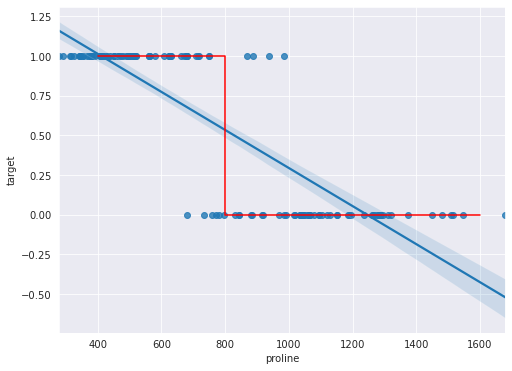

In [27]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.regplot(x=df_wine_2class.proline,y=df_wine_2class.target);
ax.plot([400,800,800,1600],[1,1,0,0],c='r');

- Want something with that looks like a threshold
- Would like a prediction between 0 and 1

# Logistic Regression

<center>$\Large logistic(x) = \frac{1}{1+e^{(-x)}}$</center>

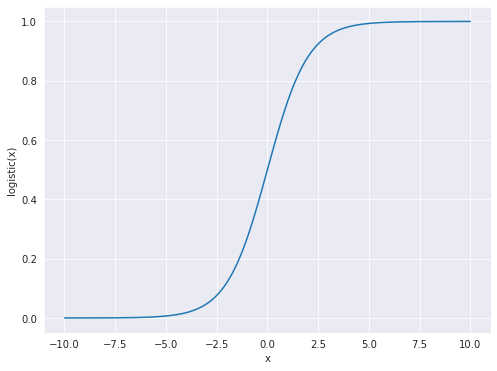

In [28]:
def logistic(x,w1=1,w0=0):
    return 1 / (1+np.exp(-(w0+w1*x)))

x = np.linspace(-10,10,1000) # generate 1000 numbers evenly spaced between -10 and 10
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(x,logistic(x));
ax.set_xlabel('x');ax.set_ylabel('logistic(x)');

# Logistic Regression with sklearn

- Our problem becomes: $P(y_i=1|x_i) = logistic(w_0 + w_1 x_i)+\varepsilon_i$

In [29]:
from sklearn.linear_model import LogisticRegression

X = df_wine_2class.proline.values.reshape(-1,1)
y = df_wine_2class.target

logr = LogisticRegression(fit_intercept=True).fit(X,y)
print(f'w_0 = {logr.intercept_[0]:0.2f}')
print(f'w_1 = {logr.coef_[0][0]:0.2f}')

w_0 = 11.97
w_1 = -0.01


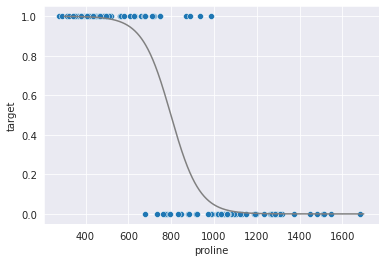

In [30]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
x = np.linspace(300,1700,1000)
logistic_x = logistic(x,logr.coef_[0],logr.intercept_)
ax.plot(x,logistic_x,c='gray');
sns.scatterplot(x=df_wine_2class.proline,y=df_wine_2class.target, ax=ax);

# Adding the Threshold

- Can treat the output of the logistic function as $P(y=1|x)$
- Threshold at .5 (50%) to get class prediction

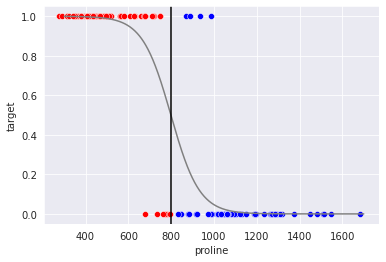

In [31]:
threshold = x[np.argmin(np.abs(logistic_x - .5))]

predicted_0 = df_wine_2class[df_wine_2class.proline <= threshold]
predicted_1 = df_wine_2class[df_wine_2class.proline > threshold]

fig,ax = plt.subplots(1,1,figsize=(6,4))
sns.scatterplot(x='proline',y='target', data=predicted_0, color='r',ax=ax);
sns.scatterplot(x='proline',y='target', data=predicted_1, color='b',ax=ax);
ax.plot(x,logistic_x,c='gray');
ax.axvline(threshold,c='k');

# Getting Predictions from sklearn

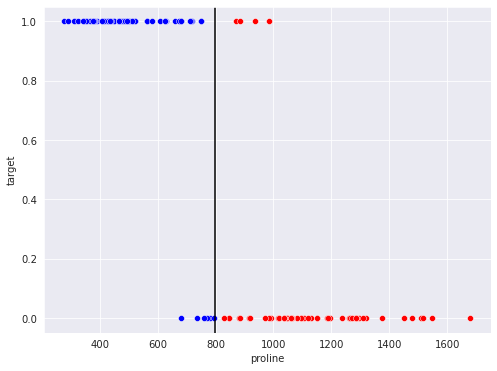

In [32]:
yhat = logr.predict(X)

predicted_0 = df_wine_2class[yhat==0]
predicted_1 = df_wine_2class[yhat==1]

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.scatterplot(x='proline',y='target', data=predicted_0, color='r',ax=ax);
sns.scatterplot(x='proline',y='target', data=predicted_1, color='b',ax=ax);
ax.axvline(threshold,c='k');

Note we have some errors!

# Getting Probabilities from sklearn

- said we could use output of logistic as $P(y=1|x)$

In [33]:
p_y = logr.predict_proba(X)
p_y[:5] # p(y=0|x), p(y=1|x)

array([[9.81833759e-01, 1.81662409e-02],
       [9.77356984e-01, 2.26430157e-02],
       [9.96947414e-01, 3.05258552e-03],
       [9.99963234e-01, 3.67664871e-05],
       [2.77482032e-01, 7.22517968e-01]])

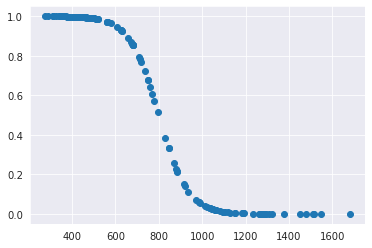

In [34]:
plt.scatter(df_wine_2class.proline,p_y[:,1]);

# Interpreting Logistic Regression Coefficients
<br>

- After some math

<center>
$\log\left(\frac{y_i}{1-y_i}\right) = w_0 + w_1 x_{i1}$</center>

- this is the **log odds ratio** of p(y=1)/p(y=0)
- odds range from 0 to positive infinity


- odds(5) -> 5/1 -> 5 out of 6 times -> .83


- odds(.2) -> 1/5 -> 1 out of 6 times -> .16


See [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/) for a good explanation


# Logistic Regression with Multiple Features

In [35]:
X = df_wine_2class[['proline','hue']]
logrm = LogisticRegression().fit(X,y)
for (name,coef) in zip(X.columns,logrm.coef_[0]):
    print(f'{name:10s} : {coef: 0.3f}')

proline    : -0.015
hue        :  0.600


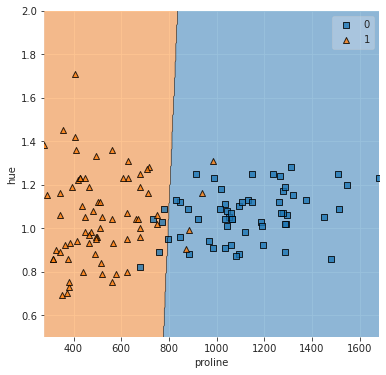

In [36]:
# need to have run: conda install -n eods-f20 -c conda-forge mlxtend
from mlxtend.plotting import plot_decision_regions

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=logrm, ax=ax);
ax.set_xlabel(X.columns[0]); ax.set_ylabel(X.columns[1]);
ax.set_ylim(.5,2);

# Linearly Seperable Data
<br>


- Logistic Regression depends on data being linearly seperable
<br>
<br>

<div align="center"><img src="images/linearly_seperable.png"></div>

From PML

# Which boundary should we use? Support Vector Machines (SVMs)
<br>
<br>

- For a linearly seperable dataset, where should we place the decision boundary?
- Support Vector Machine (SVM) tries to "maximize the margin" between classes
<br>
<br>

<div align="center"><img src="images/which_hyperplane.png" width="1200px"></div>

From PML

# SVM Hyperparameter C
<br>

- **Hyperparameter**: Something we set
<br>
<br>

<div align="center"><img src="images/svm_hyperparameter.png" width="1200px"></div>

From PML

# SVM with sklearn

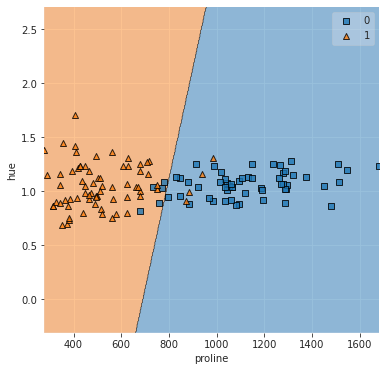

In [37]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X,y);

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X.values, y.values, clf=svm_linear);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# Non-Linear Boundaries with SVMs Kernel Trick

- **Kernel Trick**: Map data to a higher dimensional space and find linear boundary there
<br>
<br>
<div align="center"><img src="images/svm_kernel_trick.png" width="800px"></div>
    
From PML

# SVM Kernel Trick with RBF Kernel

- RBF (Radial-Basis Function) kernel

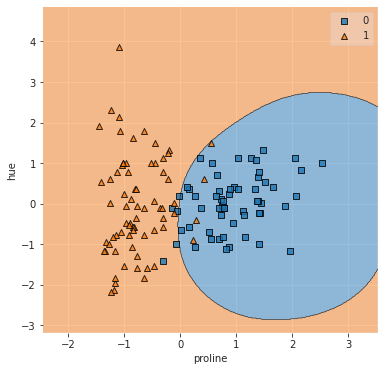

In [38]:
# need to standardize first!
X_zscore = X.apply(lambda x: (x-x.mean())/x.std())

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_zscore,y);

fig,ax = plt.subplots(1,1,figsize=(6,6))
plot_decision_regions(X_zscore.values, y.values, clf=svm_rbf);
plt.xlabel(X.columns[0]); plt.ylabel(X.columns[1]);

# From Perceptron to Artificial Neural Network
<br>

<div align="center"><img src="images/neuron.png"></div>

From PML

# Perceptron: Early Neuron Model
<br>
<br>

<div align="center"><img src="images/perceptron.png"></div>

From PML

# Perceptron to Adaline
<br>
<br>

<div align="center"><img src="images/perceptron_to_adaline.png" width="1000px"></div>
From PML

# Adaline to Linear Regression
<br>
<br>

<div align="center"><img src="images/adaline_to_logisticregression.png" width="1000px"></div>
From PML

# Multilayer Neural Network
<br>

<div align="center"><img src="images/multilayer_neural_net.png" width="800px"></div>

From PML

<br>
<br>

# <center>Questions re Classification with Linear Models?</center>
<br>
<br>